# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv(r"D:\GosiaW\Private\1_Kursy\Statystyka\nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [92]:
da['DMDMARTLx']= da['DMDMARTL'].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never_married", 6: "Living_with_partner", 77: "Refused", 99: "Don't_know" })
da['DMDMARTLx']= da['DMDMARTLx'].fillna("Missing")

In [93]:
#Frequency table for all people
da['DMDMARTLx'].value_counts()

Married                2780
Never_married          1004
Divorced                579
Living_with_partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [94]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
#da.loc[:, ["RIAGENDRx","DMDMARTLx"]].head(13)

In [95]:
#Frequency table for women only
f=da.loc[da["RIAGENDRx"] == "Female", ["DMDMARTLx"]]
f["DMDMARTLx"].value_counts()

Married                1303
Never_married           520
Divorced                350
Widowed                 296
Living_with_partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [96]:
#Frequency table for men only
m=da.loc[da["RIAGENDRx"] == "Male", ["DMDMARTLx"]]
m["DMDMARTLx"].value_counts()

Married                1477
Never_married           484
Living_with_partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [97]:
#dividing by agegroups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
da["agegrp"].head(12)

0     (60.0, 70.0]
1     (50.0, 60.0]
2     (70.0, 80.0]
3     (50.0, 60.0]
4     (40.0, 50.0]
5     (70.0, 80.0]
6     (18.0, 30.0]
7     (30.0, 40.0]
8              NaN
9     (50.0, 60.0]
10    (40.0, 50.0]
11    (40.0, 50.0]
Name: agegrp, dtype: category
Categories (6, interval[int64]): [(18, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [98]:
x=da.groupby("agegrp")["DMDMARTLx"].value_counts()
x

agegrp    DMDMARTLx          
(18, 30]  Never_married          521
          Married                262
          Living_with_partner    209
          Missing                128
          Separated               18
          Divorced                13
          Widowed                  2
(30, 40]  Married                516
          Never_married          186
          Living_with_partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
(40, 50]  Married                570
          Divorced               103
          Never_married          102
          Living_with_partner     70
          Separated               44
          Widowed                 14
(50, 60]  Married                553
          Divorced               140
          Never_married           89
          Living_with_partner     66
          Widowed                 38
          Separated               37
        

In [99]:
x1=x.unstack()
x1

DMDMARTLx,Divorced,Living_with_partner,Married,Missing,Never_married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(18, 30]",13.0,209.0,262.0,128.0,521.0,NaN,18.0,2.0
"(30, 40]",67.0,129.0,516.0,NaN,186.0,1.0,29.0,4.0
"(40, 50]",103.0,70.0,570.0,NaN,102.0,NaN,44.0,14.0
"(50, 60]",140.0,66.0,553.0,NaN,89.0,1.0,37.0,38.0
"(60, 70]",140.0,41.0,503.0,NaN,76.0,NaN,36.0,82.0
"(70, 80]",116.0,12.0,376.0,NaN,30.0,NaN,22.0,256.0


In [100]:
#frequency table for (30,40] age group, for both sexes
x2=x1.iloc[1,:]
x2.sort_values(ascending=False)

DMDMARTLx
Married                516.0
Never_married          186.0
Living_with_partner    129.0
Divorced                67.0
Separated               29.0
Widowed                  4.0
Refused                  1.0
Missing                  NaN
Name: (30, 40], dtype: float64

In [101]:
fem_age=da.loc[da["RIAGENDRx"] == "Female", ["DMDMARTLx", "RIDAGEYR"]]
fem_age["agegrp"] = pd.cut(fem_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
fem_age_groups=fem_age.groupby("agegrp")["DMDMARTLx"].value_counts()
f1=fem_age_groups.unstack()
f2=f1.iloc[1,:]
f2.sort_values(ascending=False)

DMDMARTLx
Married                258.0
Never_married           97.0
Living_with_partner     57.0
Divorced                43.0
Separated               17.0
Widowed                  2.0
Missing                  NaN
Refused                  NaN
Name: (30, 40], dtype: float64

In [102]:
men_age=da.loc[da["RIAGENDRx"] == "Male", ["DMDMARTLx", "RIDAGEYR"]]
men_age["agegrp"] = pd.cut(men_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
men_age_groups=men_age.groupby("agegrp")["DMDMARTLx"].value_counts()
m1=men_age_groups.unstack()
m2=m1.iloc[1,:]
m2.sort_values(ascending=False)

DMDMARTLx
Married                258.0
Never_married           89.0
Living_with_partner     72.0
Divorced                24.0
Separated               12.0
Widowed                  2.0
Refused                  1.0
Missing                  NaN
Name: (30, 40], dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [103]:
f_vc=f["DMDMARTLx"].value_counts()
m_vc=m["DMDMARTLx"].value_counts()
combined_f_m=pd.concat([f_vc,m_vc], axis=1, keys=['Martial_stat_fem', 'Martial_stat_male'], sort=True)
sorted_frame=combined_f_m.sort_values(by="Martial_stat_fem", ascending=False)
distr=sorted_frame.drop(index=['Missing','Refused'])
distr

,Martial_stat_fem,Martial_stat_male
Married,1303,1477
Never_married,520,484
Divorced,350,229
Widowed,296,100
Living_with_partner,262,265
Separated,118,68


In [104]:
print("Number of females in dataset:", distr["Martial_stat_fem"].sum())
print("Number of males in dataset:", distr["Martial_stat_male"].sum())

Number of females in dataset: 2849
Number of males in dataset: 2623


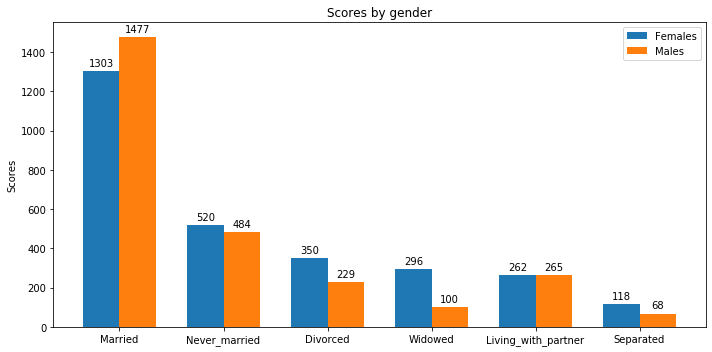

In [105]:
labels = distr.index
females = distr["Martial_stat_fem"]
males = distr["Martial_stat_male"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, females, width, label='Females')
rects2 = ax.bar(x + width/2, males, width, label='Males')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [106]:
#Dane bezwzględne trudne do porównania - trzeba znormalizować
norm = distr.apply(lambda x: x/x.sum()*100, axis=0)
norm = norm.round(1)
norm = norm.rename(columns={"Martial_stat_fem": "Martial_stat_fem_%", "Martial_stat_male": "Martial_stat_male_%"})
norm

,Martial_stat_fem_%,Martial_stat_male_%
Married,45.7,56.3
Never_married,18.3,18.5
Divorced,12.3,8.7
Widowed,10.4,3.8
Living_with_partner,9.2,10.1
Separated,4.1,2.6


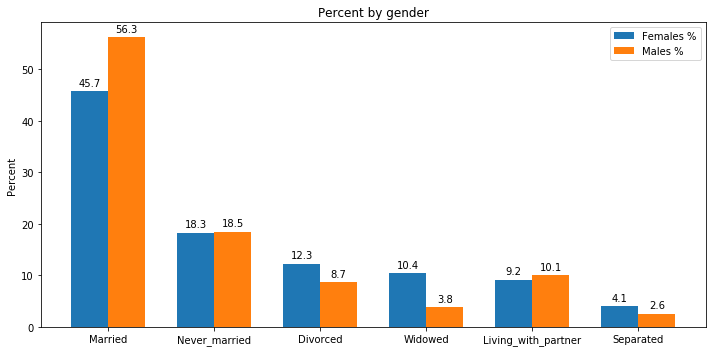

In [107]:
labels = norm.index
females = norm["Martial_stat_fem_%"]
males = norm["Martial_stat_male_%"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, females, width, label='Females %')
rects2 = ax.bar(x + width/2, males, width, label='Males %')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [108]:
f_vc=f["DMDMARTLx"].value_counts()
f_age=f2.sort_values(ascending=False)
combined_f_fem_age=pd.concat([f_vc,f_age], axis=1, keys=['Martial_stat_fem', 'Martial_stat_fem_30_40'], sort=True)
combined_f_fem_age=combined_f_fem_age.sort_values(by="Martial_stat_fem", ascending=False)
distr_fem=combined_f_fem_age.drop(index=['Missing','Refused'])
distr_fem

,Martial_stat_fem,Martial_stat_fem_30_40
Married,1303,258.0
Never_married,520,97.0
Divorced,350,43.0
Widowed,296,2.0
Living_with_partner,262,57.0
Separated,118,17.0


In [109]:
norm_fem = distr_fem.apply(lambda x: x/x.sum()*100, axis=0)
norm_fem = norm_fem.round(1)
norm_fem = norm_fem.rename(columns={"Martial_stat_fem": "Martial_stat_fem_%", "Martial_stat_fem_30_40": "Martial_stat_fem_30_40_%"})
norm_fem

,Martial_stat_fem_%,Martial_stat_fem_30_40_%
Married,45.7,54.4
Never_married,18.3,20.5
Divorced,12.3,9.1
Widowed,10.4,0.4
Living_with_partner,9.2,12.0
Separated,4.1,3.6


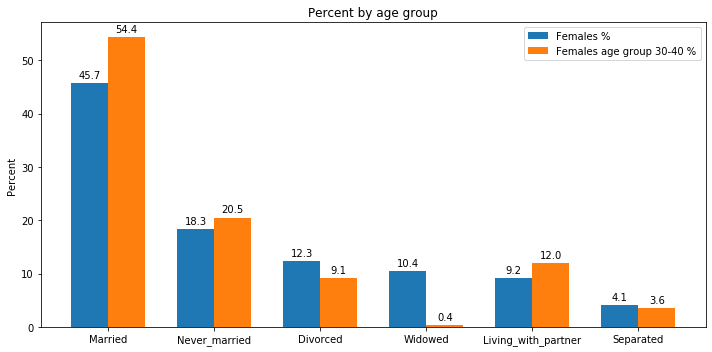

In [110]:
labels = norm_fem.index
all_females = norm_fem["Martial_stat_fem_%"]
females_30_40 = norm_fem["Martial_stat_fem_30_40_%"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, all_females, width, label='Females %')
rects2 = ax.bar(x + width/2, females_30_40, width, label='Females age group 30-40 %')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent by age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

__Q1c.__ Repeat part b for the men.

In [111]:
m_vc=m["DMDMARTLx"].value_counts()
m_age=m2.sort_values(ascending=False)
combined_m_m_age=pd.concat([m_vc,m_age], axis=1, keys=['Martial_stat_men', 'Martial_stat_men_30_40'], sort=True)
combined_m_m_age=combined_m_m_age.sort_values(by="Martial_stat_men", ascending=False)
distr_men=combined_m_m_age.drop(index=['Missing','Refused'])
norm_men = distr_men.apply(lambda x: x/x.sum()*100, axis=0)
norm_men = norm_men.round(1)
norm_men = norm_men.rename(columns={"Martial_stat_men": "Martial_stat_men_%", "Martial_stat_men_30_40": "Martial_stat_men_30_40_%"})
norm_men

,Martial_stat_men_%,Martial_stat_men_30_40_%
Married,56.3,56.5
Never_married,18.5,19.5
Living_with_partner,10.1,15.8
Divorced,8.7,5.3
Widowed,3.8,0.4
Separated,2.6,2.6


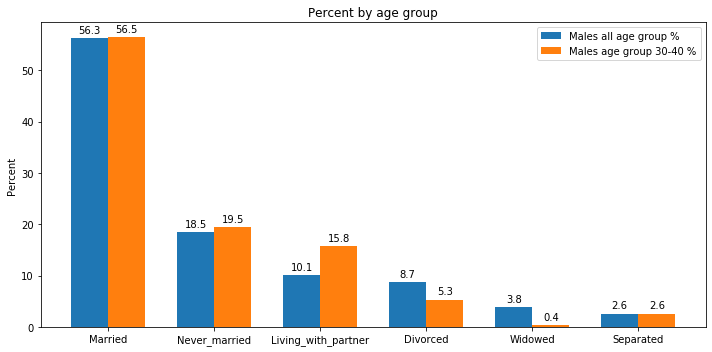

In [112]:
labels = norm_men.index
all_males = norm_men["Martial_stat_men_%"]
males_30_40 = norm_men["Martial_stat_men_30_40_%"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, all_males, width, label='Males all age group %')
rects2 = ax.bar(x + width/2, males_30_40, width, label='Males age group 30-40 %')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent by age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [113]:
fem_age=da.loc[da["RIAGENDRx"] == "Female", ["DMDMARTLx", "RIDAGEYR"]]
fem_age["agegrp"] = pd.cut(fem_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
fem_age_groups=fem_age.groupby("agegrp")["DMDMARTLx"].value_counts()
fem_age_groups
f1=fem_age_groups.unstack()
f1=f1.drop(columns=["Missing","Refused"])
f1=f1.fillna(0)
norm_f1 = f1.apply(lambda x: x/x.sum(), axis=1)
norm_f1 = norm_f1.round(3)
norm_f1

DMDMARTLx,Divorced,Living_with_partner,Married,Never_married,Separated,Widowed
agegrp,,,,,,
"(18, 30]",0.020,0.206,0.286,0.468,0.020,0.000
"(30, 40]",0.091,0.120,0.544,0.205,0.036,0.004
"(40, 50]",0.137,0.074,0.574,0.125,0.066,0.024
"(50, 60]",0.177,0.068,0.548,0.090,0.058,0.060
"(60, 70]",0.193,0.043,0.481,0.086,0.050,0.147
"(70, 80]",0.144,0.007,0.317,0.051,0.020,0.461


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [114]:
men_age=da.loc[da["RIAGENDRx"] == "Male", ["DMDMARTLx", "RIDAGEYR"]]
men_age["agegrp"] = pd.cut(men_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
men_age_groups=men_age.groupby("agegrp")["DMDMARTLx"].value_counts()
m1=men_age_groups.unstack()
m1=m1.drop(columns=["Missing","Refused"])
m1=m1.fillna(0)
norm_m1 = m1.apply(lambda x: x/x.sum(), axis=1)
norm_m1 = norm_m1.round(3)
norm_m1

DMDMARTLx,Divorced,Living_with_partner,Married,Never_married,Separated,Widowed
agegrp,,,,,,
"(18, 30]",0.004,0.201,0.220,0.555,0.015,0.004
"(30, 40]",0.053,0.158,0.565,0.195,0.026,0.004
"(40, 50]",0.085,0.082,0.703,0.097,0.027,0.005
"(50, 60]",0.126,0.075,0.652,0.104,0.022,0.022
"(60, 70]",0.126,0.050,0.666,0.087,0.032,0.039
"(70, 80]",0.142,0.022,0.612,0.022,0.035,0.167


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

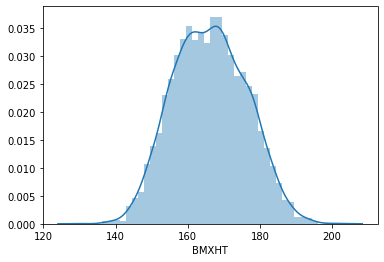

In [115]:
height=da.BMXHT.dropna()
sns.distplot(height)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

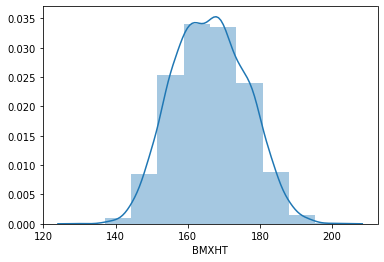

In [116]:
height=da.BMXHT.dropna()
sns.distplot(height, bins=10)

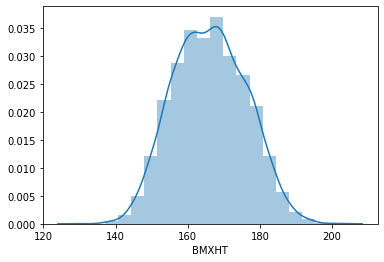

In [117]:
sns.distplot(height, bins=20)

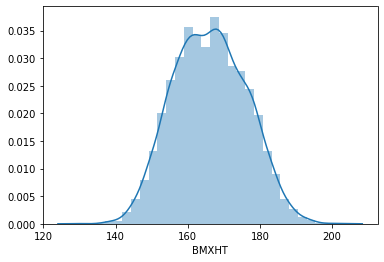

In [118]:
sns.distplot(height, bins=30)

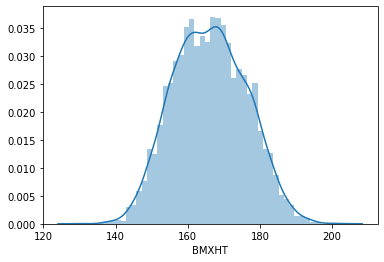

In [119]:
sns.distplot(height, bins=50)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [120]:
#Women
fem_height=da.loc[da["RIAGENDRx"] == "Female", ["BMXHT"]]
fem_height.head(5)

,BMXHT
3,160.9
4,164.9
5,150.0
7,151.3
12,163.6


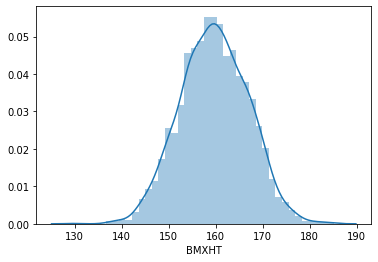

In [121]:
#Women histogram
x_fh=fem_height["BMXHT"].dropna()
sns.distplot(x_fh)

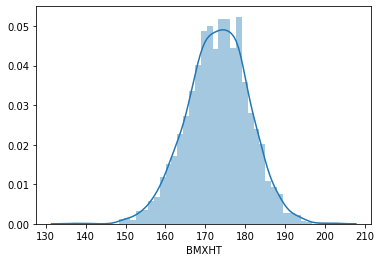

In [122]:
#Men
men_height=da.loc[da["RIAGENDRx"] == "Male", ["BMXHT"]]
x_mh=men_height["BMXHT"].dropna()
sns.distplot(x_mh)

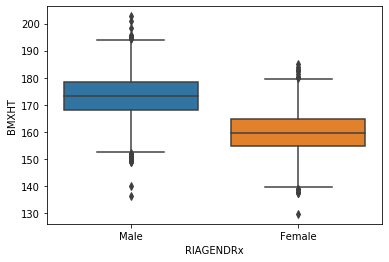

In [123]:
#Boxplots for women and men
height=da["BMXHT"].dropna()
sns.boxplot(y=height, x="RIAGENDRx", data=da)

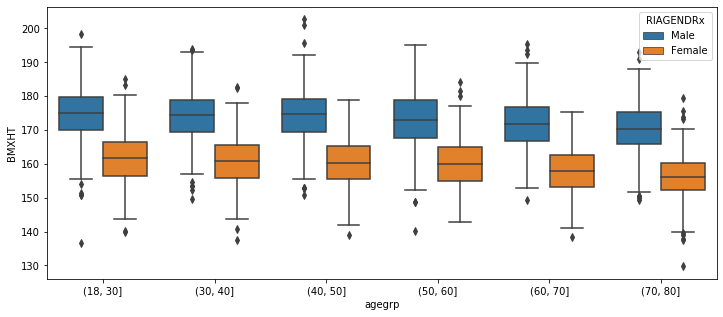

In [124]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BMXHT", hue="RIAGENDRx", data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [125]:
df=da[["BPXSY1","BPXSY2"]]
dfd=df.dropna()
dfd.count()

BPXSY1    5369
BPXSY2    5369
dtype: int64

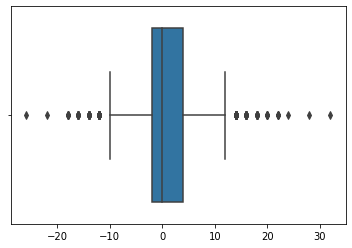

In [126]:
a = (dfd["BPXSY1"] - dfd["BPXSY2"])
sns.boxplot(a)
#wartości ujemne oznaczają, że przy drugim pomiarze ciśnienie było jednak większe :)

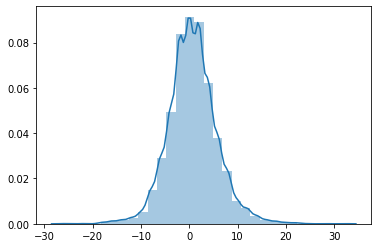

In [127]:
sns.distplot(a, bins=30)

In [128]:
a.head()

0     4.0
1     6.0
2     6.0
3    -2.0
4   -14.0
dtype: float64

In [129]:
dfd.head()

,BPXSY1,BPXSY2
0,128.0,124.0
1,146.0,140.0
2,138.0,132.0
3,132.0,134.0
4,100.0,114.0


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [130]:
#First measurement
dfd["BPXSY1"].describe()

count    5369.000000
mean      125.088471
std        18.493801
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [131]:
#Second measurement
dfd["BPXSY2"].describe()

count    5369.000000
mean      124.413485
std        18.191573
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [132]:
a = (dfd["BPXSY1"] > dfd["BPXSY2"])
prop = a.sum()/len(dfd["BPXSY1"].dropna())
prop.round(2)

0.46

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

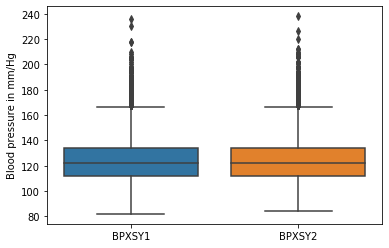

In [133]:
blood_press = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = blood_press.set_ylabel("Blood pressure in mm/Hg")

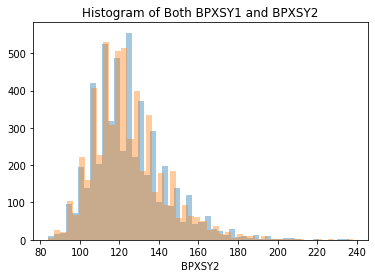

In [134]:
sns.distplot(dfd["BPXSY1"], kde=False)
sns.distplot(dfd["BPXSY2"], kde = False).set_title("Histogram of Both BPXSY1 and BPXSY2")
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [135]:
#DMDHHSIZ - Total number of people in the Household
#DMDEDUC2 - Education level - Adults 20+

da[["DMDEDUC2","DMDHHSIZ"]].head()
da["DMDEDUC2x"] = da["DMDEDUC2"].replace({1.0 : "< 9th grade", 2.0 : "9th-11th", 3.0 : "HighSchool/GED", 4.0 : "Some College/AA", 5.0 : "College", 7.0 : "Refused", 9.0 : "Don't know" })
da["DMDEDUC2x"].value_counts()

Some College/AA    1621
College            1366
HighSchool/GED     1186
< 9th grade         655
9th-11th            643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [136]:
educ_houshold=da.groupby("DMDEDUC2x")["DMDHHSIZ"].value_counts()
ehu=educ_houshold.unstack()
ehu_prop=ehu.apply(lambda x: x/x.sum(), axis=1)
epr=ehu_prop.round(2)
epr

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9th-11th,0.12,0.22,0.16,0.15,0.15,0.11,0.09
< 9th grade,0.11,0.22,0.15,0.13,0.15,0.11,0.13
College,0.14,0.35,0.19,0.17,0.10,0.03,0.03
Don't know,NaN,0.67,NaN,NaN,0.33,NaN,NaN
HighSchool/GED,0.15,0.27,0.17,0.16,0.11,0.07,0.07
Some College/AA,0.15,0.27,0.19,0.17,0.12,0.05,0.05


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [141]:
age_30_40 = da.loc[(da.RIDAGEYR > 30) & (da.RIDAGEYR < 40), ["DMDEDUC2x","DMDHHSIZ","RIAGENDRx"]]
age_30_40.head()

,DMDEDUC2x,DMDHHSIZ,RIAGENDRx
7,Some College/AA,4,Female
34,Some College/AA,3,Female
50,HighSchool/GED,7,Female
61,HighSchool/GED,4,Female
65,College,2,Female


In [143]:
fem_age_34=age_30_40.loc[age_30_40["RIAGENDRx"] == "Female", ["DMDEDUC2x","DMDHHSIZ"]]
fem_age_34.head()

,DMDEDUC2x,DMDHHSIZ
7,Some College/AA,4
34,Some College/AA,3
50,HighSchool/GED,7
61,HighSchool/GED,4
65,College,2


In [154]:
print("Median household for women aged 30-40 vs different education level:", fem_age_34.groupby("DMDEDUC2x")["DMDHHSIZ"].median())
print("Mean household for women aged 30-40 vs different education level:", fem_age_34.groupby("DMDEDUC2x")["DMDHHSIZ"].mean().round(2))

Median household for women aged 30-40 vs different education level: DMDEDUC2x
9th-11th           5
< 9th grade        5
College            4
HighSchool/GED     5
Some College/AA    4
Name: DMDHHSIZ, dtype: int64
Mean household for women aged 30-40 vs different education level: DMDEDUC2x
9th-11th           4.36
< 9th grade        4.97
College            3.45
HighSchool/GED     4.76
Some College/AA    4.31
Name: DMDHHSIZ, dtype: float64


In [155]:
men_age_34=age_30_40.loc[age_30_40["RIAGENDRx"] == "Male", ["DMDEDUC2x","DMDHHSIZ"]]
men_age_34.head()
print("Median household for women aged 30-40 vs different education level:", men_age_34.groupby("DMDEDUC2x")["DMDHHSIZ"].median())
print("Mean household for women aged 30-40 vs different education level:", men_age_34.groupby("DMDEDUC2x")["DMDHHSIZ"].mean().round(2))

Median household for women aged 30-40 vs different education level: DMDEDUC2x
9th-11th           5
< 9th grade        5
College            3
HighSchool/GED     4
Some College/AA    4
Name: DMDHHSIZ, dtype: int64
Mean household for women aged 30-40 vs different education level: DMDEDUC2x
9th-11th           4.52
< 9th grade        5.14
College            3.22
HighSchool/GED     4.08
Some College/AA    3.87
Name: DMDHHSIZ, dtype: float64


## Question 6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [185]:
# SDMVSTRA - Masked variance pseudo-stratum
# SDMVPSU - Masked variance pseudo-PSU

da[["SDMVSTRA","SDMVPSU"]].head()

,SDMVSTRA,SDMVPSU
0,125,1
1,125,1
2,131,1
3,131,1
4,126,2


In [186]:
# O ile rozumiem, dla każdej grupy "zamaskowanych osób" trzeba policzyć poszczególne średnie
da["SDMVSTRA"].value_counts().sort_values()

119    297
120    344
133    351
122    366
124    366
123    374
126    375
128    388
127    389
129    390
121    390
130    391
131    434
125    434
132    446
Name: SDMVSTRA, dtype: int64

In [187]:
# O ile rozumiem, dla każdej grupy "zamaskowanych osób" trzeba policzyć poszczególne średnie
da["SDMVPSU"].value_counts().sort_values()

2    2798
1    2937
Name: SDMVPSU, dtype: int64

In [188]:
da.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2)
print("Largest mean value (age):", da.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max())
print("Smallest mean value (age):", da.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min())
print("The ratio between the largest and smallest mean (age):", (da.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max()/da.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min()).round(2))

Largest mean value (age): 51.98
Smallest mean value (age): 43.85
The ratio between the largest and smallest mean (age): 1.19


In [189]:
da.groupby("SDMVSTRA")["BMXHT"].mean().round(2)
print("Largest mean value (height):", da.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max())
print("Smallest mean value (height):", da.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height):", (da.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max()/da.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min()).round(2))

Largest mean value (height): 168.41
Smallest mean value (height): 163.84
The ratio between the largest and smallest mean (height): 1.03


In [190]:
da.groupby("SDMVSTRA")["BMXBMI"].mean().round(2)
print("Largest mean value (BMI):", da.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max())
print("Smallest mean value (BMI):", da.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min())
print("The ratio between the largest and smallest mean (BMI):", (da.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max()/da.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min()).round(2))

Largest mean value (BMI): 31.18
Smallest mean value (BMI): 27.49
The ratio between the largest and smallest mean (BMI): 1.13


In [210]:
#To co wyżej, tylko podział na płeć - dane dla kobiet
fem_SDMVSTRA=da.loc[da["RIAGENDRx"] == "Female", ["SDMVSTRA","RIDAGEYR","BMXHT","BMXBMI"]]
fem_SDMVSTRA.head()
fem_SDMVSTRA["SDMVSTRA"].value_counts()

132    225
131    223
127    217
125    211
128    208
130    203
129    202
123    201
126    198
124    197
121    191
119    181
133    180
120    171
122    168
Name: SDMVSTRA, dtype: int64

In [192]:
fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2)
print("Largest mean value (age, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max())
print("Smallest mean value (age, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min())
print("The ratio between the largest and smallest mean (age, females):", (fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max()/fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min()).round(2))

Largest mean value (age, females): 51.87
Smallest mean value (age, females): 43.68
The ratio between the largest and smallest mean (age, females): 1.19


In [193]:
fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2)
print("Largest mean value (height, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max())
print("Smallest mean value (height, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height, females):", (fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max()/fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min()).round(2))

Largest mean value (height, females): 161.81
Smallest mean value (height, females): 157.02
The ratio between the largest and smallest mean (height, females): 1.03


In [194]:
fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2)
print("Largest mean value (BMI, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max())
print("Smallest mean value (BMI, females):", fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min())
print("The ratio between the largest and smallest mean (BMI, females):", (fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max()/fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min()).round(2))

Largest mean value (BMI, females): 31.74
Smallest mean value (BMI, females): 27.93
The ratio between the largest and smallest mean (BMI, females): 1.14


In [211]:
#To co wyżej, tylko podział na płeć - dane dla mężczyzn
men_SDMVSTRA=da.loc[da["RIAGENDRx"] == "Male", ["SDMVSTRA","RIDAGEYR","BMXHT","BMXBMI"]]
men_SDMVSTRA.head()
men_SDMVSTRA["SDMVSTRA"].value_counts()

125    223
132    221
131    211
121    199
122    198
129    188
130    188
128    180
126    177
123    173
120    173
127    172
133    171
124    169
119    116
Name: SDMVSTRA, dtype: int64

In [196]:
men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2)
print("Largest mean value (age, males):", men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max())
print("Smallest mean value (age, males):", men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min())
print("The ratio between the largest and smallest mean (age, males):", (men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).max()/men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].mean().round(2).min()).round(2))

Largest mean value (age, males): 53.6
Smallest mean value (age, males): 44.01
The ratio between the largest and smallest mean (age, males): 1.22


In [197]:
men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2)
print("Largest mean value (height, males):", men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max())
print("Smallest mean value (height, males):", men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height, males):", (men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).max()/men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].mean().round(2).min()).round(2))

Largest mean value (height, males): 175.97
Smallest mean value (height, males): 170.68
The ratio between the largest and smallest mean (height, males): 1.03


In [198]:
men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2)
print("Largest mean value (height, males):", men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max())
print("Smallest mean value (height, males):", men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height, males):", (men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).max()/men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].mean().round(2).min()).round(2))

Largest mean value (height, males): 30.81
Smallest mean value (height, males): 27.03
The ratio between the largest and smallest mean (height, males): 1.14


In [213]:
#druga zmienna maskująca: SDMVPSU
#dane dla kobiet
fem_SDMVPSU=da.loc[da["RIAGENDRx"] == "Female", ["SDMVPSU","RIDAGEYR","BMXHT","BMXBMI"]]
fem_SDMVPSU.head()
fem_SDMVPSU["SDMVPSU"].value_counts()

1    1513
2    1463
Name: SDMVPSU, dtype: int64

In [215]:
fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2)
print("Largest mean value (age, females):", fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).max())
print("Smallest mean value (age, females):", fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).min())
print("The ratio between the largest and smallest mean (age, females):", (fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).max()/fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).min()).round(2))

Largest mean value (age, females): 47.94
Smallest mean value (age, females): 47.64
The ratio between the largest and smallest mean (age, females): 1.01


In [216]:
fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2)
print("Largest mean value (height, females):", fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).max())
print("Smallest mean value (height, females):", fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height, females):", (fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).max()/fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).min()).round(2))

Largest mean value (height, females): 160.01
Smallest mean value (height, females): 159.35
The ratio between the largest and smallest mean (height, females): 1.0


In [217]:
fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2)
print("Largest mean value (BMI, females):", fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).max())
print("Smallest mean value (BMI, females):", fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).min())
print("The ratio between the largest and smallest mean (BMI, females):", (fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).max()/fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).min()).round(2))

Largest mean value (BMI, females): 30.47
Smallest mean value (BMI, females): 29.39
The ratio between the largest and smallest mean (BMI, females): 1.04


In [218]:
#druga zmienna maskująca: SDMVPSU
#dane dla mężczyzn
men_SDMVPSU=da.loc[da["RIAGENDRx"] == "Male", ["SDMVPSU","RIDAGEYR","BMXHT","BMXBMI"]]
men_SDMVPSU.head()
men_SDMVPSU["SDMVPSU"].value_counts()

1    1424
2    1335
Name: SDMVPSU, dtype: int64

In [219]:
men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2)
print("Largest mean value (age, males):", men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).max())
print("Smallest mean value (age, males):", men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).min())
print("The ratio between the largest and smallest mean (age, males):", (men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).max()/men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].mean().round(2).min()).round(2))

Largest mean value (age, males): 48.6
Smallest mean value (age, males): 48.04
The ratio between the largest and smallest mean (age, males): 1.01


In [221]:
men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2)
print("Largest mean value (height, males):", men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).max())
print("Smallest mean value (height, males):", men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).min())
print("The ratio between the largest and smallest mean (height, males):", (men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).max()/men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].mean().round(2).min()).round(2))

Largest mean value (height, males): 173.46
Smallest mean value (height, males): 172.82
The ratio between the largest and smallest mean (height, males): 1.0


In [222]:
men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2)
print("Largest mean value (BMI, males):", men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).max())
print("Smallest mean value (BMI, males):", men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).min())
print("The ratio between the largest and smallest mean (BMI, males):", (men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).max()/men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].mean().round(2).min()).round(2))

Largest mean value (BMI, males): 29.16
Smallest mean value (BMI, males): 28.37
The ratio between the largest and smallest mean (BMI, males): 1.03


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smallest IQR across the MVUs.

In [230]:
# females, "SDMVSTRA"
fem_SDMVSTRA=da.loc[da["RIAGENDRx"] == "Female", ["SDMVSTRA","RIDAGEYR","BMXHT","BMXBMI"]]
fem_SDMVSTRA.head()

,SDMVSTRA,RIDAGEYR,BMXHT,BMXBMI
3,131,56,160.9,42.4
4,126,42,164.9,20.3
5,128,72,150.0,28.6
7,125,32,151.3,28.2
12,124,30,163.6,26.6


In [248]:
#print("25th percentile (females, age):", fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.25))
#print("75th percentile (females, age):", fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.75))
#print("50th percentile (females, age):", fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.50))
p_25fem_age=fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.25)
p_75fem_age=fem_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.75)
IQR_fem_age=p_75fem_age-p_25fem_age
IQR_fem_age.max()
print("IQR for age variable:", IQR_fem_age)
print("Ratio between the largest and smallest IQR:", (IQR_fem_age.max()/IQR_fem_age.min()).round(2))

IQR for age variable: SDMVSTRA
119    33.00
120    26.50
121    26.00
122    25.25
123    32.00
124    31.00
125    31.00
126    31.00
127    29.00
128    29.50
129    26.00
130    33.00
131    28.50
132    33.00
133    32.00
Name: RIDAGEYR, dtype: float64
Ratio between the largest and smallest IQR: 1.31


In [260]:
p_25fem_height=fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].quantile(0.25)
p_75fem_height=fem_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].quantile(0.75)
IQR_fem_height=p_75fem_height-p_25fem_height
IQR_fem_height.max()
print("IQR for height variable:", IQR_fem_height)
print("Ratio between the largest and smallest IQR:", (IQR_fem_height.max()/IQR_fem_height.min()).round(2))

IQR for height variable: SDMVSTRA
119     9.700
120     9.175
121     9.775
122     9.250
123    10.825
124     9.950
125     9.800
126    10.550
127     9.975
128     9.650
129     9.600
130     8.950
131     8.100
132    11.050
133     9.700
Name: BMXHT, dtype: float64
Ratio between the largest and smallest IQR: 1.36


In [261]:
p_25fem_BMI=fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].quantile(0.25)
p_75fem_BMI=fem_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].quantile(0.75)
IQR_fem_BMI=p_75fem_BMI-p_25fem_BMI
IQR_fem_BMI.max()
print("IQR for BMI variable:", IQR_fem_BMI)
print("Ratio between the largest and smallest IQR:", (IQR_fem_BMI.max()/IQR_fem_BMI.min()).round(2))

IQR for BMI variable: SDMVSTRA
119     9.500
120    10.175
121     9.100
122     9.075
123    10.175
124     9.050
125     9.050
126    10.100
127    10.375
128     9.875
129     9.550
130    10.250
131    10.975
132    11.250
133     9.150
Name: BMXBMI, dtype: float64
Ratio between the largest and smallest IQR: 1.24


In [256]:
men_SDMVSTRA=da.loc[da["RIAGENDRx"] == "Male", ["SDMVSTRA","RIDAGEYR","BMXHT","BMXBMI"]]
men_SDMVSTRA.head()

,SDMVSTRA,RIDAGEYR,BMXHT,BMXBMI
0,125,62,184.5,27.8
1,125,53,171.4,30.8
2,131,78,170.1,28.8
6,128,22,165.4,28.0
8,122,18,166.1,26.2


In [257]:
p_25men_age=men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.25)
p_75men_age=men_SDMVSTRA.groupby("SDMVSTRA")["RIDAGEYR"].quantile(0.75)
IQR_men_age=p_75men_age-p_25men_age
IQR_men_age.max()
print("IQR for age variable:", IQR_men_age)
print("Ratio between the largest and smallest IQR:", (IQR_men_age.max()/IQR_men_age.min()).round(2))

IQR for age variable: SDMVSTRA
119    30.5
120    25.0
121    31.0
122    29.0
123    29.0
124    31.0
125    33.0
126    35.0
127    29.0
128    31.0
129    25.5
130    32.0
131    32.5
132    32.0
133    31.0
Name: RIDAGEYR, dtype: float64
Ratio between the largest and smallest IQR: 1.4


In [262]:
p_25men_height=men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].quantile(0.25)
p_75men_height=men_SDMVSTRA.groupby("SDMVSTRA")["BMXHT"].quantile(0.75)
IQR_men_height=p_75men_height-p_25men_height
IQR_men_height.max()
print("IQR for height variable:", IQR_men_height)
print("Ratio between the largest and smallest IQR:", (IQR_men_height.max()/IQR_men_height.min()).round(2))

IQR for height variable: SDMVSTRA
119    10.450
120    11.300
121    10.900
122    11.025
123     9.350
124    10.250
125     9.200
126     9.400
127     9.250
128    10.800
129    11.400
130     8.750
131     9.300
132    10.600
133     8.925
Name: BMXHT, dtype: float64
Ratio between the largest and smallest IQR: 1.3


In [263]:
p_25men_BMI=men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].quantile(0.25)
p_75men_BMI=men_SDMVSTRA.groupby("SDMVSTRA")["BMXBMI"].quantile(0.75)
IQR_men_BMI=p_75men_BMI-p_25men_BMI
IQR_men_BMI.max()
print("IQR for BMI variable:", IQR_men_BMI)
print("Ratio between the largest and smallest IQR:", (IQR_men_BMI.max()/IQR_men_BMI.min()).round(2))

IQR for BMI variable: SDMVSTRA
119    5.500
120    8.075
121    7.275
122    6.425
123    8.200
124    7.025
125    8.225
126    7.700
127    7.600
128    7.750
129    6.300
130    7.850
131    7.300
132    7.800
133    6.625
Name: BMXBMI, dtype: float64
Ratio between the largest and smallest IQR: 1.5


In [265]:
# females, "SDMVPSU"
fem_SDMVPSU=da.loc[da["RIAGENDRx"] == "Female", ["SDMVPSU","RIDAGEYR","BMXHT","BMXBMI"]]
fem_SDMVPSU.head()

,SDMVPSU,RIDAGEYR,BMXHT,BMXBMI
3,1,56,160.9,42.4
4,2,42,164.9,20.3
5,1,72,150.0,28.6
7,1,32,151.3,28.2
12,1,30,163.6,26.6


In [266]:
p_25fem_age_2=fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].quantile(0.25)
p_75fem_age_2=fem_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].quantile(0.75)
IQR_fem_age_2=p_75fem_age_2-p_25fem_age_2
IQR_fem_age_2.max()
print("IQR for age variable:", IQR_fem_age_2)
print("Ratio between the largest and smallest IQR:", (IQR_fem_age_2.max()/IQR_fem_age_2.min()).round(2))

IQR for age variable: SDMVPSU
1    30.0
2    32.0
Name: RIDAGEYR, dtype: float64
Ratio between the largest and smallest IQR: 1.07


In [267]:
p_25fem_height_2=fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].quantile(0.25)
p_75fem_height_2=fem_SDMVPSU.groupby("SDMVPSU")["BMXHT"].quantile(0.75)
IQR_fem_height_2=p_75fem_height_2-p_25fem_height_2
IQR_fem_height_2.max()
print("IQR for height variable:", IQR_fem_height_2)
print("Ratio between the largest and smallest IQR:", (IQR_fem_height_2.max()/IQR_fem_height_2.min()).round(2))

IQR for height variable: SDMVPSU
1     9.7
2    10.3
Name: BMXHT, dtype: float64
Ratio between the largest and smallest IQR: 1.06


In [271]:
p_25fem_BMI_2=fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].quantile(0.25)
p_75fem_BMI_2=fem_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].quantile(0.75)
IQR_fem_BMI_2=p_75fem_BMI_2-p_25fem_BMI_2
IQR_fem_BMI_2.max()
print("IQR for BMI variable:", IQR_fem_BMI_2)
print("Ratio between the largest and smallest IQR:", (IQR_fem_BMI_2.max()/IQR_fem_BMI_2.min()).round(2))

IQR for BMI variable: SDMVPSU
1     9.825
2    10.200
Name: BMXBMI, dtype: float64
Ratio between the largest and smallest IQR: 1.04


In [269]:
# males, "SDMVPSU"
men_SDMVPSU=da.loc[da["RIAGENDRx"] == "Male", ["SDMVPSU","RIDAGEYR","BMXHT","BMXBMI"]]
men_SDMVPSU.head()

,SDMVPSU,RIDAGEYR,BMXHT,BMXBMI
0,1,62,184.5,27.8
1,1,53,171.4,30.8
2,1,78,170.1,28.8
6,2,22,165.4,28.0
8,2,18,166.1,26.2


In [270]:
p_25men_age_2=men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].quantile(0.25)
p_75men_age_2=men_SDMVPSU.groupby("SDMVPSU")["RIDAGEYR"].quantile(0.75)
IQR_men_age_2=p_75men_age_2-p_25men_age_2
IQR_men_age_2.max()
print("IQR for age variable:", IQR_men_age_2)
print("Ratio between the largest and smallest IQR:", (IQR_men_age_2.max()/IQR_men_age_2.min()).round(2))

IQR for age variable: SDMVPSU
1    32.0
2    31.0
Name: RIDAGEYR, dtype: float64
Ratio between the largest and smallest IQR: 1.03


In [272]:
p_25men_height_2=men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].quantile(0.25)
p_75men_height_2=men_SDMVPSU.groupby("SDMVPSU")["BMXHT"].quantile(0.75)
IQR_men_height_2=p_75men_height_2-p_25men_height_2
IQR_men_height_2.max()
print("IQR for height variable:", IQR_men_height_2)
print("Ratio between the largest and smallest IQR:", (IQR_men_height_2.max()/IQR_men_height_2.min()).round(2))

IQR for height variable: SDMVPSU
1    10.55
2    10.20
Name: BMXHT, dtype: float64
Ratio between the largest and smallest IQR: 1.03


In [273]:
p_25men_BMI_2=men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].quantile(0.25)
p_75men_BMI_2=men_SDMVPSU.groupby("SDMVPSU")["BMXBMI"].quantile(0.75)
IQR_men_BMI_2=p_75men_BMI_2-p_25men_BMI_2
IQR_men_BMI_2.max()
print("IQR for BMI variable:", IQR_men_BMI_2)
print("Ratio between the largest and smallest IQR:", (IQR_men_BMI_2.max()/IQR_men_BMI_2.min()).round(2))

IQR for BMI variable: SDMVPSU
1    7.5
2    7.3
Name: BMXBMI, dtype: float64
Ratio between the largest and smallest IQR: 1.03


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.